# Plotting Figures for Paper

In [30]:
### IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


### Parameters
n_admm = 10
n_scp = 12
n_iter = n_admm * n_scp
num_faulty = 6
num_nominal = 14
num_agents = num_faulty + num_nominal

## Noise Effect Plot

In [31]:
### Load Data
high_noise_data = np.load('data/single_static/compare_err_conv-high_noise-2024-07-08_01-18-01.npz')
low_noise_data = np.load('data/single_static/compare_err_conv-low_noise-2024-07-08_01-17-18.npz')

In [32]:
### Process High Noise Data

## Grab Data from Dictionary
high_noise_low_rho_faulty = high_noise_data['x_norm_low_faulty']
high_noise_low_rho_nominal = high_noise_data['x_norm_low_nominal']
high_noise_high_rho_faulty = high_noise_data['x_norm_high_faulty']
high_noise_high_rho_nominal = high_noise_data['x_norm_high_nominal']

## Create Arrays for Plotting

# High Noise - Low Rho
hnlr_lb = np.zeros(n_iter)
hnlr_m = np.zeros(n_iter)
hnlr_ub = np.zeros(n_iter)
# High Noise - High Rho
hnhr_lb = np.zeros(n_iter)
hnhr_m = np.zeros(n_iter)
hnhr_ub = np.zeros(n_iter)
# Over each iteration
for i in range(n_iter):
    # Low Rho Combining
    lr_mean = ((num_faulty*high_noise_low_rho_faulty[i, 1]) + (num_nominal*high_noise_low_rho_nominal[i, 1])) / num_agents
    
    faulty_stdev = (high_noise_low_rho_faulty[i, 2] - high_noise_low_rho_faulty[i, 0]) / 2
    nominal_stdev = (high_noise_low_rho_nominal[i, 2] - high_noise_low_rho_nominal[i, 0]) / 2
    lr_stdev = np.sqrt((np.power(faulty_stdev, 2) * (num_faulty-1) + np.power(nominal_stdev, 2) * (num_nominal-1)) / (num_agents-1))
    
    hnlr_lb[i] = lr_mean - lr_stdev
    hnlr_m[i] = lr_mean
    hnlr_ub[i] = lr_mean + lr_stdev
    
    # High Rho Combining
    hr_mean = ((num_faulty*high_noise_high_rho_faulty[i, 1]) + (num_nominal*high_noise_high_rho_nominal[i, 1])) / num_agents
    
    faulty_stdev = (high_noise_high_rho_faulty[i, 2] - high_noise_high_rho_faulty[i, 0]) / 2
    nominal_stdev = (high_noise_high_rho_nominal[i, 2] - high_noise_high_rho_nominal[i, 0]) / 2
    hr_stdev = np.sqrt((np.power(faulty_stdev, 2) * (num_faulty-1) + np.power(nominal_stdev, 2) * (num_nominal-1)) / (num_agents-1))
    
    hnhr_lb[i] = hr_mean - hr_stdev
    hnhr_m[i] = hr_mean
    hnhr_ub[i] = hr_mean + hr_stdev

In [33]:
### Process Low Noise Data

## Grab Data from Dictionary
low_noise_low_rho_faulty = low_noise_data['x_norm_low_faulty']
low_noise_low_rho_nominal = low_noise_data['x_norm_low_nominal']
low_noise_high_rho_faulty = low_noise_data['x_norm_high_faulty']
low_noise_high_rho_nominal = low_noise_data['x_norm_high_nominal']

## Create Arrays for Plotting

# Low Noise - Low Rho
lnlr_lb = np.zeros(n_iter)
lnlr_m = np.zeros(n_iter)
lnlr_ub = np.zeros(n_iter)
# Low Noise - High Rho
lnhr_lb = np.zeros(n_iter)
lnhr_m = np.zeros(n_iter)
lnhr_ub = np.zeros(n_iter)
# Over each iteration
for i in range(n_iter):
    # Low Rho Combining
    lr_mean = ((num_faulty*low_noise_low_rho_faulty[i, 1]) + (num_nominal*low_noise_low_rho_nominal[i, 1])) / num_agents
    
    faulty_stdev = (low_noise_low_rho_faulty[i, 2] - low_noise_low_rho_faulty[i, 0]) / 2
    nominal_stdev = (low_noise_low_rho_nominal[i, 2] - low_noise_low_rho_nominal[i, 0]) / 2
    lr_stdev = np.sqrt((np.power(faulty_stdev, 2) * (num_faulty-1) + np.power(nominal_stdev, 2) * (num_nominal-1)) / (num_agents-1))
    
    lnlr_lb[i] = lr_mean - lr_stdev
    lnlr_m[i] = lr_mean
    lnlr_ub[i] = lr_mean + lr_stdev
    
    # High Rho Combining
    hr_mean = ((num_faulty*low_noise_high_rho_faulty[i, 1]) + (num_nominal*low_noise_high_rho_nominal[i, 1])) / num_agents
    
    faulty_stdev = (low_noise_high_rho_faulty[i, 2] - low_noise_high_rho_faulty[i, 0]) / 2
    nominal_stdev = (low_noise_high_rho_nominal[i, 2] - low_noise_high_rho_nominal[i, 0]) / 2
    hr_stdev = np.sqrt((np.power(faulty_stdev, 2) * (num_faulty-1) + np.power(nominal_stdev, 2) * (num_nominal-1)) / (num_agents-1))
    
    lnhr_lb[i] = hr_mean - hr_stdev
    lnhr_m[i] = hr_mean
    lnhr_ub[i] = hr_mean + hr_stdev

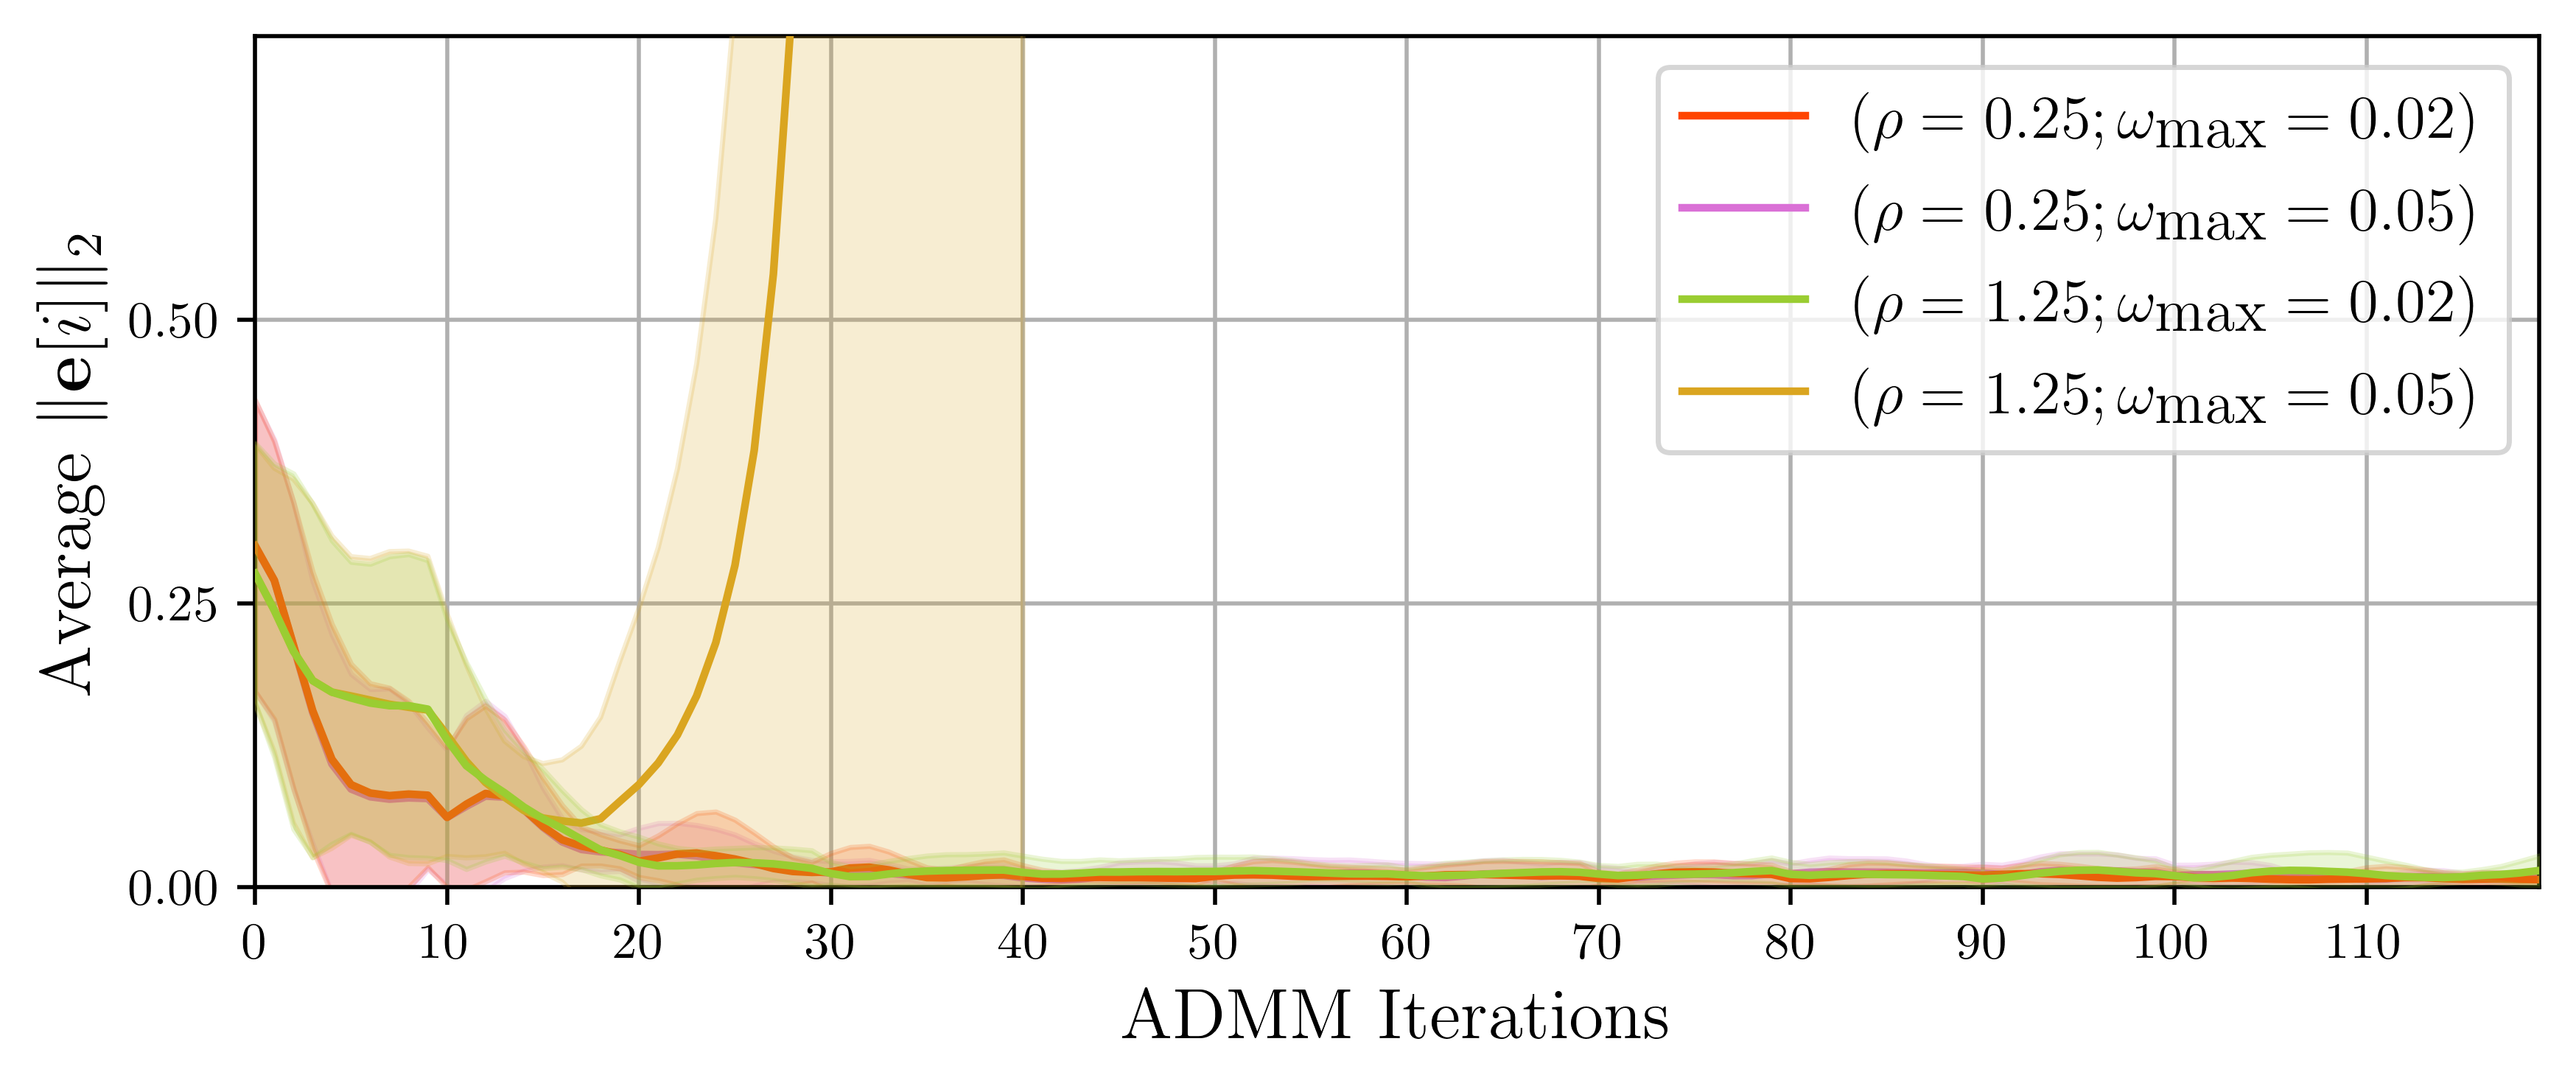

In [34]:
### Plot Error 

save_err = True
plt.rcParams.update({
                    'text.usetex': True,
                    'font.serif': 'Cambria'
                    })

# Prelims
err_fig = plt.figure(dpi=500, figsize=(8,3))
ax_err = err_fig.add_subplot()
areas = [None] * 4
lines = [None] * 4
fail_point = 41

# Low Noise - Low Rho
ax_err.fill_between(np.arange(n_iter), lnlr_lb, lnlr_ub,
                    alpha=0.2, color='orangered', zorder=2)
lines[0] = ax_err.plot(np.arange(n_iter), lnlr_m,
                       c='orangered', zorder=3,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{0.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    #    label=r'$\| \mathbf{e}_{0.25}(0.02) \|_{2,1} / | \mathcal{V} |$')
                       label=r'$(\rho = 0.25; \omega_\textnormal{max} = 0.02)$')

# High Noise - Low Rho
ax_err.fill_between(np.arange(n_iter), hnlr_lb, hnlr_ub,
                    alpha=0.2, color='orchid', zorder=0)
lines[2] = ax_err.plot(np.arange(n_iter), hnlr_m,
                       c='orchid', zorder=1,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{1.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{0.25}(0.05) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 0.25; \omega_\textnormal{max} = 0.05)$')

# Low Noise - High Rho
ax_err.fill_between(np.arange(n_iter), lnhr_lb, lnhr_ub,
                    alpha=0.2, color='yellowgreen', zorder=7)
lines[1] = ax_err.plot(np.arange(n_iter), lnhr_m,
                       c='yellowgreen', zorder=6, 
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{0.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{1.25}(0.02) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 1.25; \omega_\textnormal{max} = 0.02)$')

# High Noise - High Rho
ax_err.fill_between(np.arange(n_iter)[:fail_point], hnhr_lb[:fail_point], hnhr_ub[:fail_point],
                    alpha=0.2, color='goldenrod', zorder=4)
lines[3] = ax_err.plot(np.arange(n_iter)[:fail_point], hnhr_m[:fail_point],
                       c='goldenrod', zorder=5,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{1.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{1.25}(0.05) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 1.25; \omega_\textnormal{max} = 0.05)$')


# Figure Settings
ax_err.set_xlabel(r'$\textnormal{ADMM Iterations}$', fontsize=14)
ax_err.set_ylabel(r'$\textnormal{Average}$ $ \| \mathbf{e}[i] \|_2 $', fontsize=14)
# ax_err2.set_ylabel(r'$ \| \mathbf{x}[i] - ( \mathbf{x}^* [i] + \hat{\mathbf{x}}[i]) \| $')
ax_err.set_ylim((0, 0.75))
ax_err.set_xlim((0, (n_iter - 1)))
ax_err.set_xticks(ticks=np.arange(0, n_iter, n_admm))
ax_err.set_yticks(ticks=np.arange(0, 0.75, 0.25))
# Shrink current axis's height by 10% on the bottom
box = ax_err.get_position()
# ax_err.set_position([box.x0, box.y0 + bo,
#                  box.width, box.height])
# Put a legend below current axis
# ax_err.legend(loc='upper center', bbox_to_anchor=(0.45, -0.17),
#           fancybox=True, ncol=4, fontsize=8)
ax_err.legend(loc='upper right', fancybox=True, fontsize=12, ncols=1)
ax_err.grid(True)

# Save Figure
dt_string = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
fname_err = "final_fig/static/compare_err_conv-noise-" + dt_string + ".svg"
if save_err:
    plt.savefig(fname_err, dpi=500, bbox_inches='tight')

## Monte Carlo Plots

In [35]:
### Load Static Data
static_data = np.load('ToSend_240711/static/static_data.npy')
rho_data = np.load('ToSend_240711/static/rho_arr.npy')
iam_data = np.load('ToSend_240711/static/iam_arr.npy')

In [36]:
### Compute Mean and Stdev

num_rho = len(rho_data)

# Low Noise
iam1 = iam_data[0]
ln_lb = np.zeros(num_rho)
ln_m = np.zeros(num_rho)
ln_ub = np.zeros(num_rho)
for i, rho in enumerate(rho_data):
    this_trial = static_data[0, i, :]
    this_mean = np.mean(this_trial)
    this_stdev = np.std(this_trial)
    
    ln_lb[i] = this_mean - this_stdev
    ln_m[i] = this_mean
    ln_ub[i] = this_mean + this_stdev
    
# High Noise
iam2 = iam_data[1]
hn_lb = np.zeros(num_rho)
hn_m = np.zeros(num_rho)
hn_ub = np.zeros(num_rho)
for i, rho in enumerate(rho_data):
    this_trial = static_data[1, i, :]
    this_mean = np.mean(this_trial)
    this_stdev = np.std(this_trial)
    
    hn_lb[i] = this_mean - this_stdev
    hn_m[i] = this_mean
    hn_ub[i] = this_mean + this_stdev

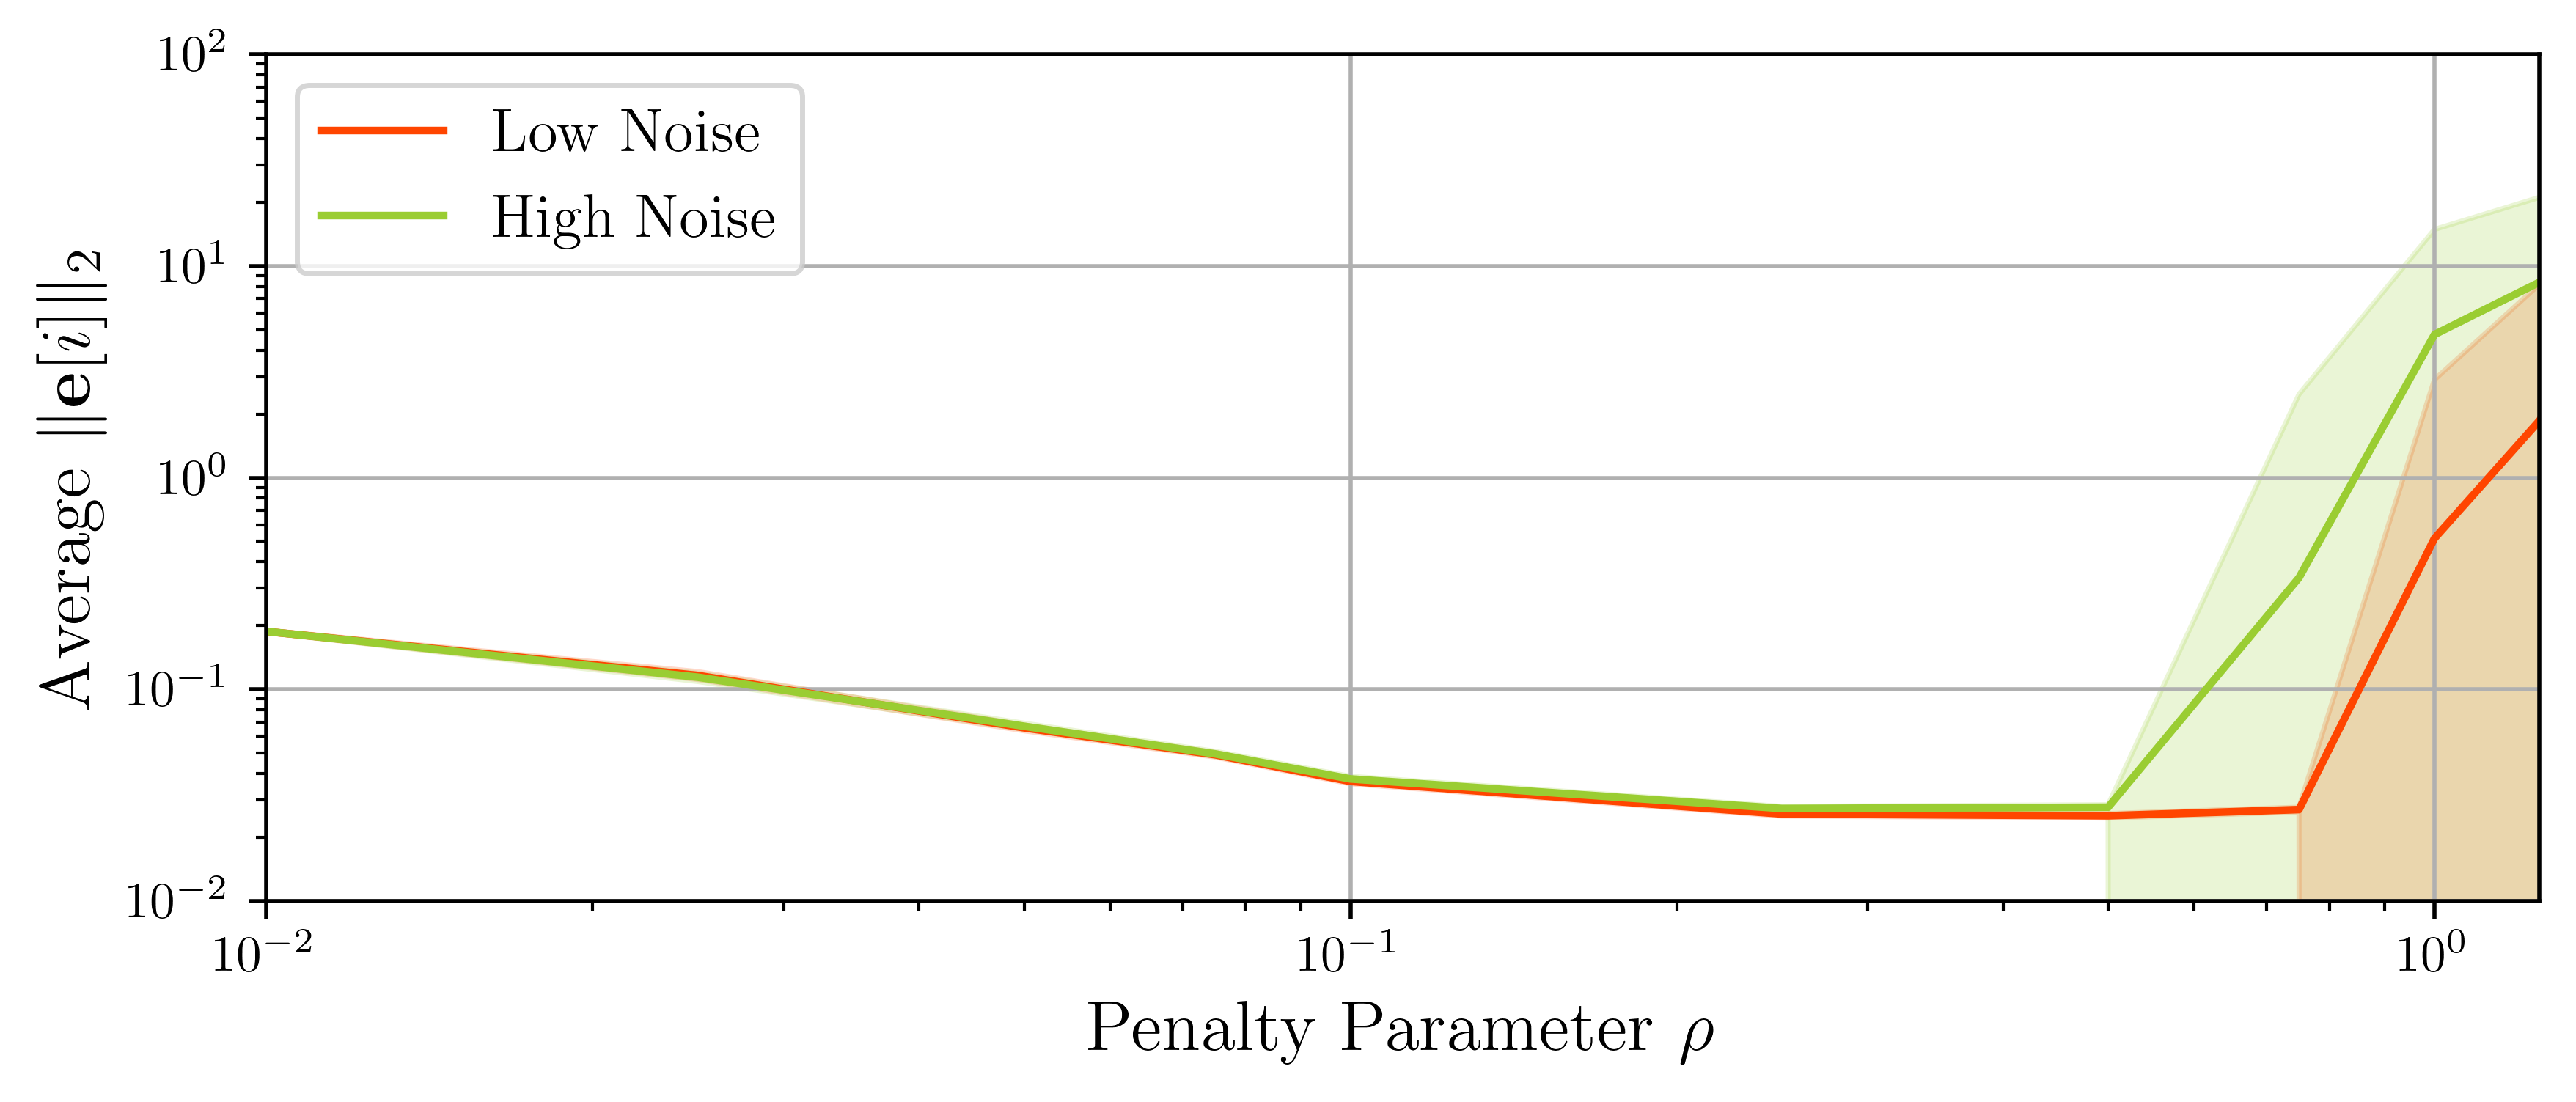

In [37]:
### Plot

fig = plt.figure(dpi=500, figsize=(8,3))
ax = fig.add_subplot()
ax.plot(rho_data, ln_m[:], c='orangered', label=r"\textnormal{Low Noise}")
ax.fill_between(rho_data, ln_lb, ln_ub, alpha=0.2, color='orangered')
ax.plot(rho_data, hn_m[:], c='yellowgreen', label=r"\textnormal{High Noise}")
ax.fill_between(rho_data, hn_lb, hn_ub, alpha=0.2, color='yellowgreen')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim((1e-2, 1e2))
ax.set_xlim((1e-2, 1.25e0))
ax.set_title("")
ax.set_xlabel(r"$\textnormal{Penalty Parameter } \rho $", fontsize=14)
ax.set_ylabel(r"$\textnormal{Average } \| \mathbf{e}[i] \|_2$", fontsize=14)
ax.legend(loc='upper left', fancybox=True, fontsize=12)
ax.grid(True)

# Save Figure
dt_string = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
fname_err = "final_fig/static/monte_carlo-noise-" + dt_string + ".svg"
if save_err:
    plt.savefig(fname_err, dpi=500, bbox_inches='tight')

In [38]:
### Load Discrete Data
discrete_data = np.load('ToSend_240711/discrete/discrete_data.npy')
rho_data = np.load('ToSend_240711/discrete/rho_arr.npy')

In [39]:
### Compute Mean and Stdev

num_rho = len(rho_data)

# Warm Start
ws_lb = np.zeros(num_rho)
ws_m = np.zeros(num_rho)
ws_ub = np.zeros(num_rho)
for i, rho in enumerate(rho_data):
    this_trial = discrete_data[0, i, :]
    this_mean = np.mean(this_trial)
    this_stdev = np.std(this_trial)
    
    ws_lb[i] = this_mean - this_stdev
    ws_m[i] = this_mean
    ws_ub[i] = this_mean + this_stdev
    
# Cold Start
cs_lb = np.zeros(num_rho)
cs_m = np.zeros(num_rho)
cs_ub = np.zeros(num_rho)
for i, rho in enumerate(rho_data):
    this_trial = discrete_data[1, i, :]
    this_mean = np.mean(this_trial)
    this_stdev = np.std(this_trial)
    
    cs_lb[i] = this_mean - this_stdev
    cs_m[i] = this_mean
    cs_ub[i] = this_mean + this_stdev

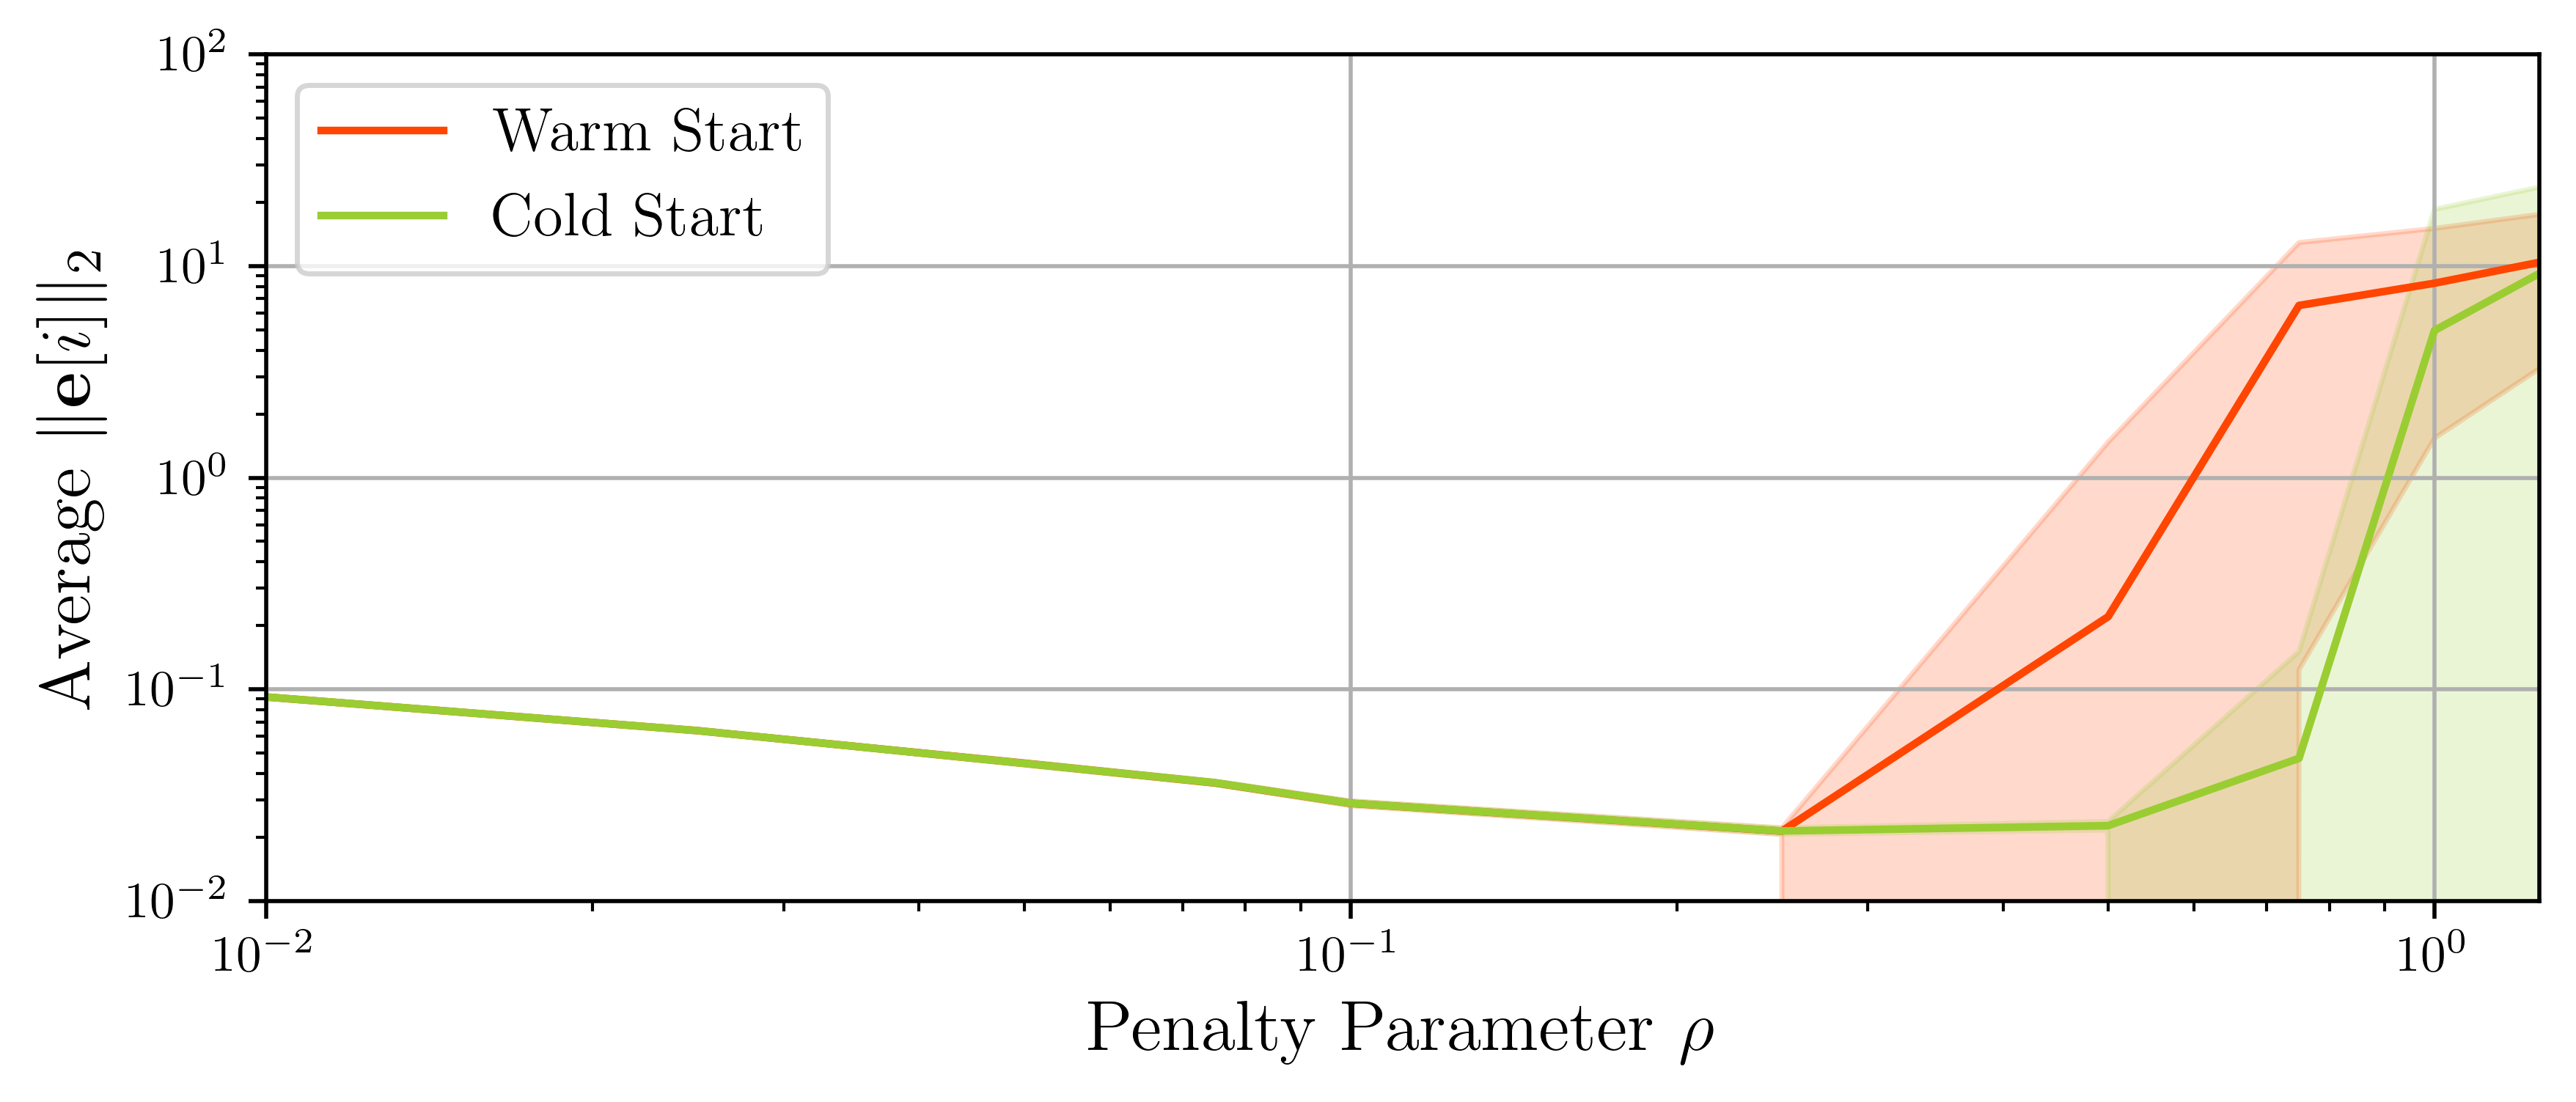

In [40]:
### Plot

fig = plt.figure(dpi=500, figsize=(8,3))
ax = fig.add_subplot()
ax.plot(rho_data, ws_m[:], c='orangered', label=r"\textnormal{Warm Start}")
ax.fill_between(rho_data, ws_lb, ws_ub, alpha=0.2, color='orangered')
ax.plot(rho_data, cs_m[:], c='yellowgreen', label=r"\textnormal{Cold Start}")
ax.fill_between(rho_data, cs_lb, cs_ub, alpha=0.2, color='yellowgreen')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim((1e-2, 1e2))
ax.set_xlim((1e-2, 1.25e0))
ax.set_title("")
ax.set_xlabel(r"$\textnormal{Penalty Parameter } \rho $", fontsize=14)
ax.set_ylabel(r"$\textnormal{Average } \| \mathbf{e}[i] \|_2$", fontsize=14)
ax.legend(loc='upper left', fancybox=True, fontsize=12)
ax.grid(True)

# Save Figure
dt_string = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
fname_err = "final_fig/static/monte_carlo-dynamic-" + dt_string + ".svg"
if save_err:
    plt.savefig(fname_err, dpi=500, bbox_inches='tight')

## Time-Varying Topology Plot

In [41]:
### Load Data
high_rho_data = np.load('data/single_discrete/compare_err_conv-high_rho-2024_07_10-02_15_51.npz')
low_rho_data = np.load('data/single_discrete/compare_err_conv-low_rho-2024_07_10-02_15_12.npz')

In [42]:
### Process High Rho Data

## Grab Data from Dictionary
high_rho_warm_faulty = high_rho_data['x_norm_warm_faulty']
high_rho_warm_nominal = high_rho_data['x_norm_warm_nominal']
high_rho_cold_faulty = high_rho_data['x_norm_cold_faulty']
high_rho_cold_nominal = high_rho_data['x_norm_cold_nominal']

## Create Arrays for Plotting

# High Rho - Warm Start
hrws_lb = np.zeros(n_iter)
hrws_m = np.zeros(n_iter)
hrws_ub = np.zeros(n_iter)
# High Rho - Cold Start
hrcs_lb = np.zeros(n_iter)
hrcs_m = np.zeros(n_iter)
hrcs_ub = np.zeros(n_iter)
# Over each iteration
for i in range(n_iter):
    # No Faulty Agents in First Third
    if (i-1) < round(n_iter/3):
        # Warm Start Combining
        ws_mean = high_rho_warm_nominal[i, 1]
        
        nominal_stdev = (high_rho_warm_nominal[i, 2] - high_rho_warm_nominal[i, 0]) / 2
        ws_stdev = nominal_stdev
        
        hrws_lb[i] = ws_mean - ws_stdev
        hrws_m[i] = ws_mean
        hrws_ub[i] = ws_mean + ws_stdev
        
        # Cold Start Combining
        cs_mean = high_rho_cold_nominal[i, 1]
        
        nominal_stdev = (high_rho_cold_nominal[i, 2] - high_rho_cold_nominal[i, 0]) / 2
        cs_stdev = nominal_stdev
        
        hrcs_lb[i] = cs_mean - cs_stdev
        hrcs_m[i] = cs_mean
        hrcs_ub[i] = cs_mean + cs_stdev
    else:
        # Warm Start Combining
        ws_mean = ((num_faulty*high_rho_warm_faulty[i, 1]) + (num_nominal*high_rho_warm_nominal[i, 1])) / num_agents
        
        faulty_stdev = (high_rho_warm_faulty[i, 2] - high_rho_warm_faulty[i, 0]) / 2
        nominal_stdev = (high_rho_warm_nominal[i, 2] - high_rho_warm_nominal[i, 0]) / 2
        ws_stdev = np.sqrt((np.power(faulty_stdev, 2)*(num_faulty-1) + np.power(nominal_stdev, 2)*(num_nominal-1)) / (num_agents-1))
        
        hrws_lb[i] = ws_mean - ws_stdev
        hrws_m[i] = ws_mean
        hrws_ub[i] = ws_mean + ws_stdev
        
        # Cold Start Combining
        cs_mean = ((num_faulty*high_rho_cold_faulty[i, 1]) + (num_nominal*high_rho_cold_nominal[i, 1])) / num_agents
        
        faulty_stdev = (high_rho_cold_faulty[i, 2] - high_rho_cold_faulty[i, 0]) / 2
        nominal_stdev = (high_rho_cold_nominal[i, 2] - high_rho_cold_nominal[i, 0]) / 2
        cs_stdev = np.sqrt((np.power(faulty_stdev, 2)*(num_faulty-1) + np.power(nominal_stdev, 2)*(num_nominal-1)) / (num_agents-1))
        
        hrcs_lb[i] = cs_mean - cs_stdev
        hrcs_m[i] = cs_mean
        hrcs_ub[i] = cs_mean + cs_stdev

In [43]:
### Process Low Rho Data

## Grab Data from Dictionary
low_rho_warm_faulty = low_rho_data['x_norm_warm_faulty']
low_rho_warm_nominal = low_rho_data['x_norm_warm_nominal']
low_rho_cold_faulty = low_rho_data['x_norm_cold_faulty']
low_rho_cold_nominal = low_rho_data['x_norm_cold_nominal']

## Create Arrays for Plotting

# Low Rho - Warm Start
lrws_lb = np.zeros(n_iter)
lrws_m = np.zeros(n_iter)
lrws_ub = np.zeros(n_iter)
# Low Rho - Cold Start
lrcs_lb = np.zeros(n_iter)
lrcs_m = np.zeros(n_iter)
lrcs_ub = np.zeros(n_iter)
# Over each iteration
for i in range(n_iter):
    # No Faulty Agents in First Third
    if (i-1) < round(n_iter/3):
        # Warm Start Combining
        ws_mean = low_rho_warm_nominal[i, 1]
        
        nominal_stdev = (low_rho_warm_nominal[i, 2] - low_rho_warm_nominal[i, 0]) / 2
        ws_stdev = nominal_stdev
        
        lrws_lb[i] = ws_mean - ws_stdev
        lrws_m[i] = ws_mean
        lrws_ub[i] = ws_mean + ws_stdev
        
        # Cold Start Combining
        cs_mean = low_rho_cold_nominal[i, 1]
        
        nominal_stdev = (low_rho_cold_nominal[i, 2] - low_rho_cold_nominal[i, 0]) / 2
        cs_stdev = nominal_stdev
        
        lrcs_lb[i] = cs_mean - cs_stdev
        lrcs_m[i] = cs_mean
        lrcs_ub[i] = cs_mean + cs_stdev
    else:
        # Warm Start Combining
        ws_mean = ((num_faulty*low_rho_warm_faulty[i, 1]) + (num_nominal*low_rho_warm_nominal[i, 1])) / num_agents
        
        faulty_stdev = (low_rho_warm_faulty[i, 2] - low_rho_warm_faulty[i, 0]) / 2
        nominal_stdev = (low_rho_warm_nominal[i, 2] - low_rho_warm_nominal[i, 0]) / 2
        ws_stdev = np.sqrt((np.power(faulty_stdev, 2)*(num_faulty-1) + np.power(nominal_stdev, 2)*(num_nominal-1)) / (num_agents-1))
        
        lrws_lb[i] = ws_mean - ws_stdev
        lrws_m[i] = ws_mean
        lrws_ub[i] = ws_mean + ws_stdev
        
        # Cold Start Combining
        cs_mean = ((num_faulty*low_rho_cold_faulty[i, 1]) + (num_nominal*low_rho_cold_nominal[i, 1])) / num_agents
        
        faulty_stdev = (low_rho_cold_faulty[i, 2] - low_rho_cold_faulty[i, 0]) / 2
        nominal_stdev = (low_rho_cold_nominal[i, 2] - low_rho_cold_nominal[i, 0]) / 2
        cs_stdev = np.sqrt((np.power(faulty_stdev, 2)*(num_faulty-1) + np.power(nominal_stdev, 2)*(num_nominal-1)) / (num_agents-1))
        
        lrcs_lb[i] = cs_mean - cs_stdev
        lrcs_m[i] = cs_mean
        lrcs_ub[i] = cs_mean + cs_stdev

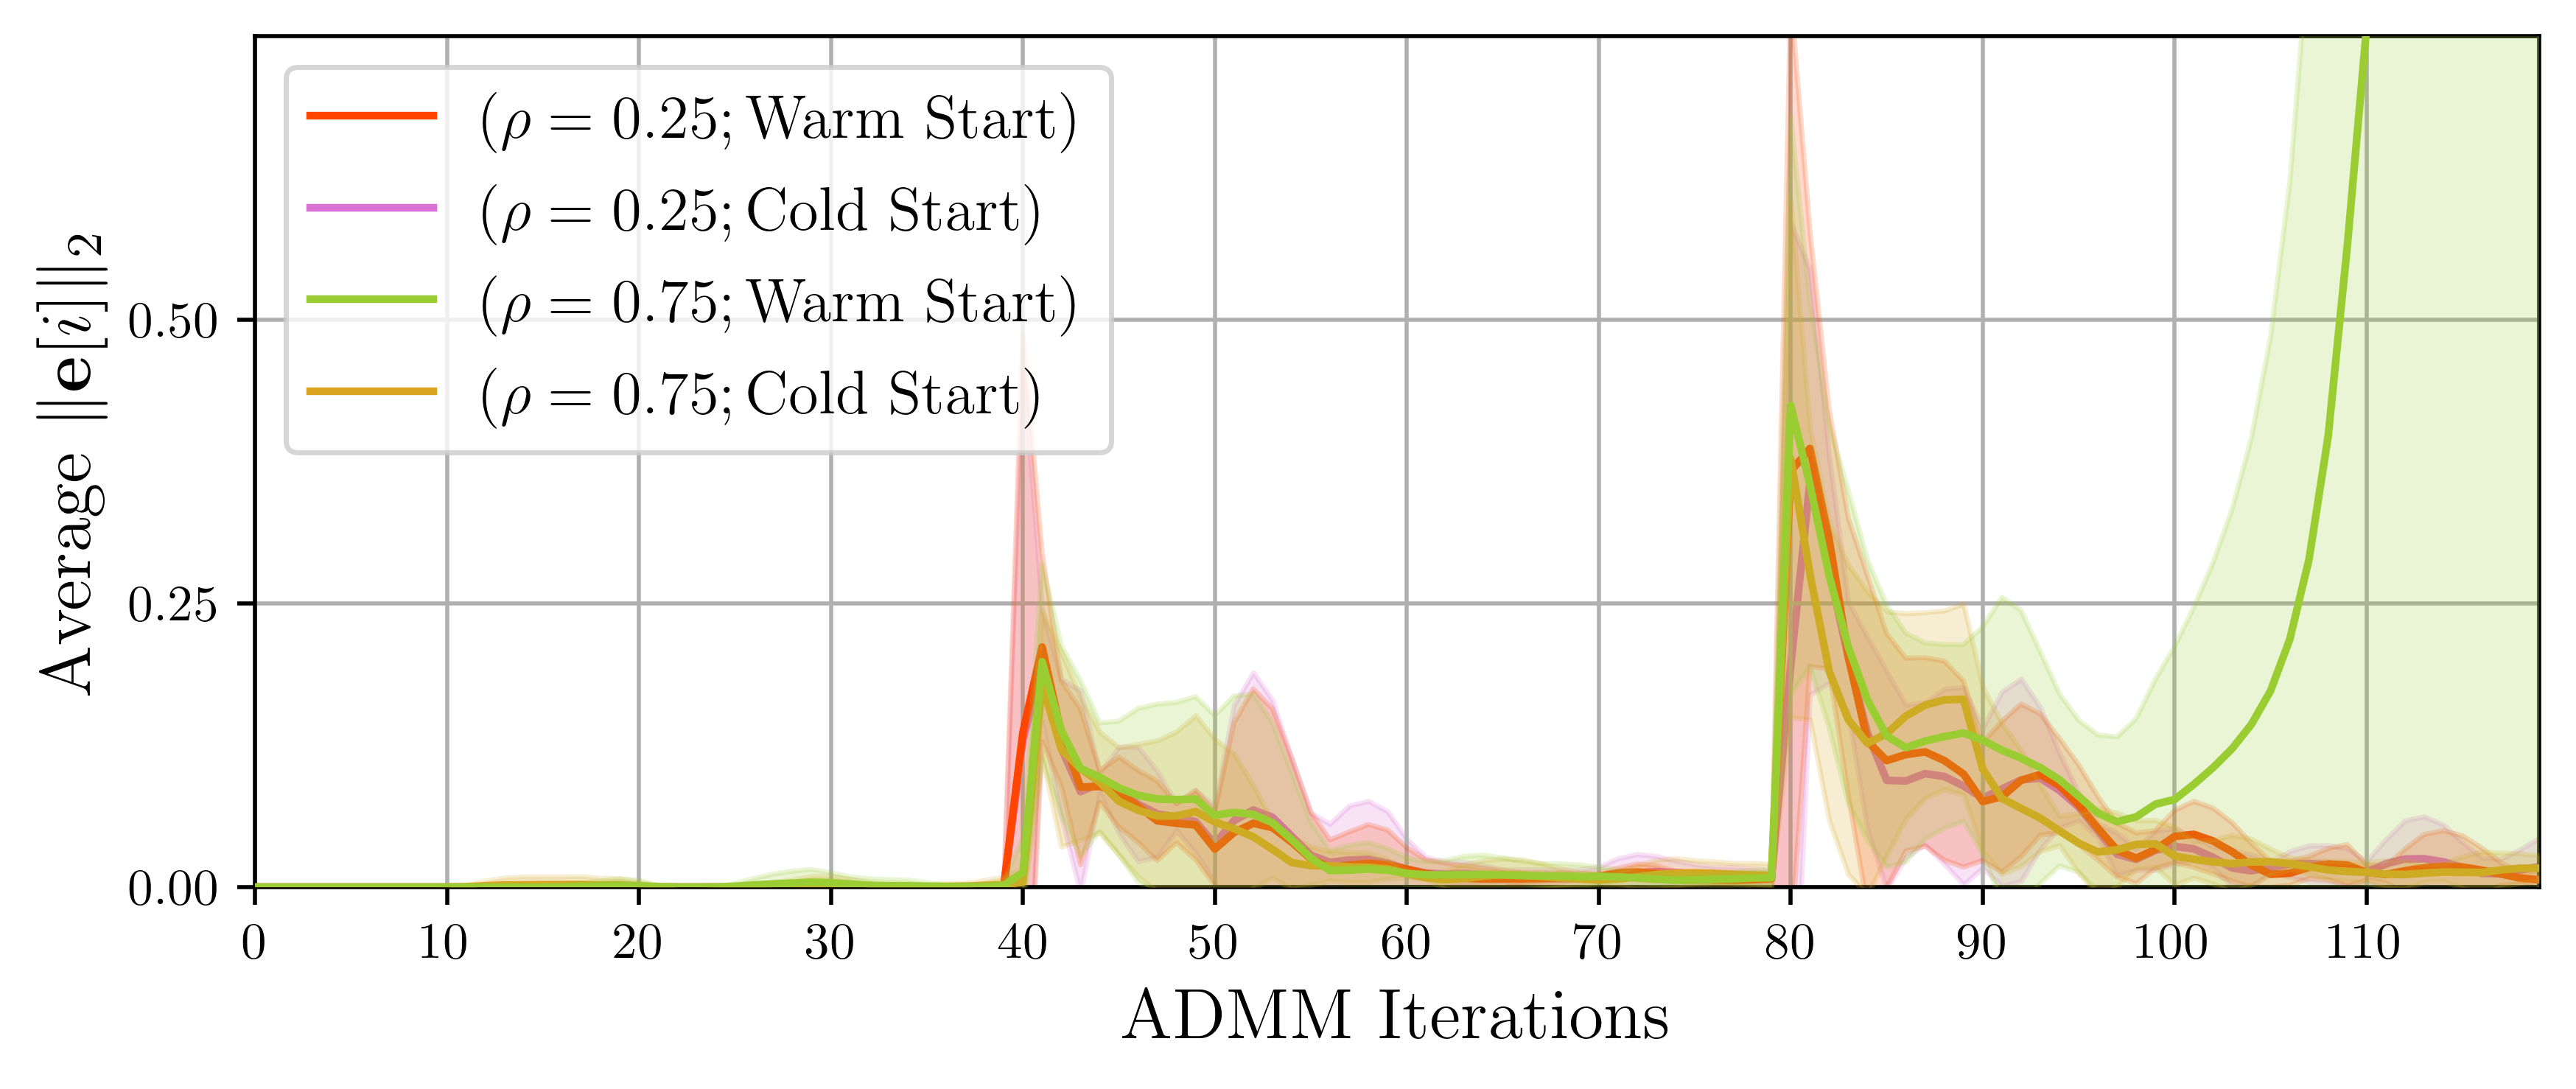

In [45]:
### Plot Error 

save_err = True
plt.rcParams.update({
                    'text.usetex': True,
                    'font.serif': 'Cambria'
                    })

# Prelims
err_fig = plt.figure(dpi=500, figsize=(8,3))
ax_err = err_fig.add_subplot()
areas = [None] * 4
lines = [None] * 4

# Warm Start - Low Rho
ax_err.fill_between(np.arange(n_iter), lrws_lb, lrws_ub,
                    alpha=0.2, color='orangered', zorder=2)
lines[0] = ax_err.plot(np.arange(n_iter), lrws_m,
                       c='orangered', zorder=3,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{0.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    #    label=r'$\| \mathbf{e}_{0.25}(0.02) \|_{2,1} / | \mathcal{V} |$')
                       label=r'$(\rho = 0.25; \textnormal{Warm Start})$')

# Cold Start - Low Rho
ax_err.fill_between(np.arange(n_iter), lrcs_lb, lrcs_ub,
                    alpha=0.2, color='orchid', zorder=0)
lines[2] = ax_err.plot(np.arange(n_iter), lrcs_m,
                       c='orchid', zorder=1,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{1.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{0.25}(0.05) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 0.25; \textnormal{Cold Start})$')

# Warm Start - High Rho
ax_err.fill_between(np.arange(n_iter), hrws_lb, hrws_ub,
                    alpha=0.2, color='yellowgreen', zorder=7)
lines[1] = ax_err.plot(np.arange(n_iter), hrws_m,
                       c='yellowgreen', zorder=6, 
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{0.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{1.25}(0.02) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 0.75; \textnormal{Warm Start})$')

# Cold Start - High Rho
ax_err.fill_between(np.arange(n_iter), hrcs_lb, hrcs_ub,
                    alpha=0.2, color='goldenrod', zorder=4)
lines[3] = ax_err.plot(np.arange(n_iter), hrcs_m,
                       c='goldenrod', zorder=5,
                    #    label=r'$\textnormal{mean}( \{ \| \mathbf{e}_{1.25}[i] \|_2 \mid i \in \mathcal{V} \} )$')
                    # label=r'$\| \mathbf{e}_{1.25}(0.05) \|_{2,1} / | \mathcal{V} |$')
                    label=r'$(\rho = 0.75; \textnormal{Cold Start})$')


# Figure Settings
ax_err.set_xlabel(r'$\textnormal{ADMM Iterations}$', fontsize=14)
ax_err.set_ylabel(r'$\textnormal{Average}$ $ \| \mathbf{e}[i] \|_2 $', fontsize=14)
# ax_err2.set_ylabel(r'$ \| \mathbf{x}[i] - ( \mathbf{x}^* [i] + \hat{\mathbf{x}}[i]) \| $')
ax_err.set_ylim((0, 0.75))
ax_err.set_xlim((0, (n_iter - 1)))
ax_err.set_xticks(ticks=np.arange(0, n_iter, n_admm))
ax_err.set_yticks(ticks=np.arange(0, 0.75, 0.25))
# ax_err.legend(loc='upper center', bbox_to_anchor=(0.45, -0.17),
#           fancybox=True, ncol=4, fontsize=8)
ax_err.legend(loc='upper left', fancybox=True, fontsize=12, ncols=1)
ax_err.grid(True)

# Save Figure
dt_string = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
fname_err = "final_fig/discrete/compare_err_conv-dyn-" + dt_string + ".svg"
if save_err:
    plt.savefig(fname_err, dpi=500, bbox_inches='tight')